# Loading Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("complete_imdb_preprocessed_dataset.csv")
df.head()

,review,sentiment,clean_lowercase,clean_lowercase_re,no_stopwords,tokens,lemmatized,revised_tokens
0,In Panic In The Streets Richard Widmark plays ...,1,in panic in the streets richard widmark plays ...,in panic in the streets richard widmark plays ...,panic streets richard widmark plays us navy do...,"['panic', 'streets', 'richard', 'widmark', 'pl...",panic street richard widmark play u navy docto...,"['panic', 'street', 'richard', 'widmark', 'pla..."
1,If you ask me the first one was really better ...,0,if you ask me the first one was really better ...,if you ask me the first one was really better ...,ask first one really better one look sarah g r...,"['ask', 'first', 'one', 'really', 'better', 'o...",ask first one really better one look sarah g r...,"['ask', 'first', 'one', 'really', 'better', 'o..."
2,I am a big fan a Faerie Tale Theatre and I've ...,1,i am a big fan a faerie tale theatre and i've ...,i am a big fan a faerie tale theatre and ive s...,big fan faerie tale theatre ive seen one best ...,"['big', 'fan', 'faerie', 'tale', 'theatre', 'i...",big fan faerie tale theatre ive seen one best ...,"['big', 'fan', 'faerie', 'tale', 'theatre', 'i..."
3,I just finished reading a book about Dillinger...,0,i just finished reading a book about dillinger...,i just finished reading a book about dillinger...,finished reading book dillinger movie horribly...,"['finished', 'reading', 'book', 'dillinger', '...",finished reading book dillinger movie horribly...,"['finished', 'reading', 'book', 'dillinger', '..."
4,Greg Davis and Bryan Daly take some crazed sta...,0,greg davis and bryan daly take some crazed sta...,greg davis and bryan daly take some crazed sta...,greg davis bryan daly take crazed statements t...,"['greg', 'davis', 'bryan', 'daly', 'take', 'cr...",greg davis bryan daly take crazed statement te...,"['greg', 'davis', 'bryan', 'daly', 'take', 'cr..."


In [3]:
df.shape

(50000, 8)

# Vectorization

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)

In [5]:
X = tfidf.fit_transform(df["lemmatized"])
y = df["sentiment"].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25000, 203415) (25000, 203415) (25000,) (25000,)


# Logistic Regression CV and Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.model_selection import validation_curve
import numpy as np

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12480
           1       0.88      0.89      0.89     12520

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



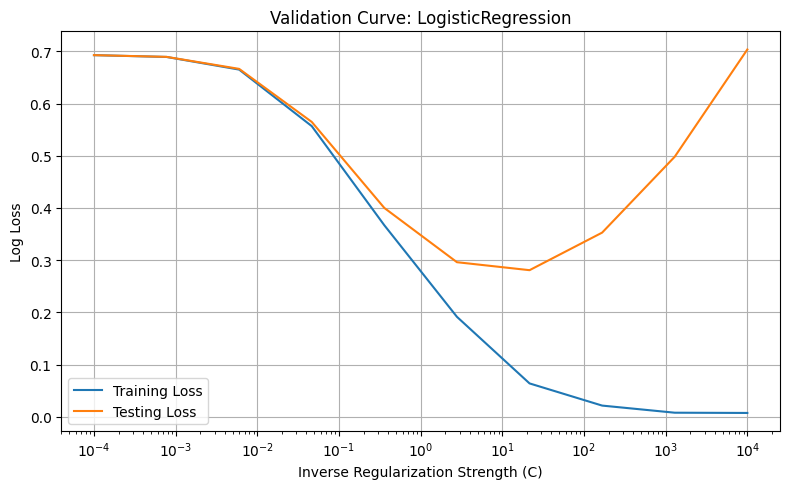

In [11]:
# Training
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train, y_train)

# Predict and Evaluate
lr_preds = lr_model.predict(X_test)
print(classification_report(y_test, lr_preds))

# Plot validation curve for regularization strength
param_range = np.logspace(-4, 4, 10)
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=1000, solver='lbfgs'),
    X_train, y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="neg_log_loss"
)

# Ploting Train and Test Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(param_range, -train_scores.mean(axis=1), label="Training Loss")
plt.plot(param_range, -test_scores.mean(axis=1), label="Testing Loss")
plt.xscale("log")
plt.xlabel("Inverse Regularization Strength (C)")
plt.ylabel("Log Loss")
plt.title("Validation Curve: LogisticRegression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {'C': np.logspace(-2, 2, 10)}
grid = GridSearchCV(LogisticRegression(max_iter=1000, solver='lbfgs'),
                    param_grid, cv=5, scoring='neg_log_loss')
grid.fit(X_train, y_train)
print("Best C:", grid.best_params_['C'])

Best C: 12.915496650148826


              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12480
           1       0.88      0.89      0.89     12520

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



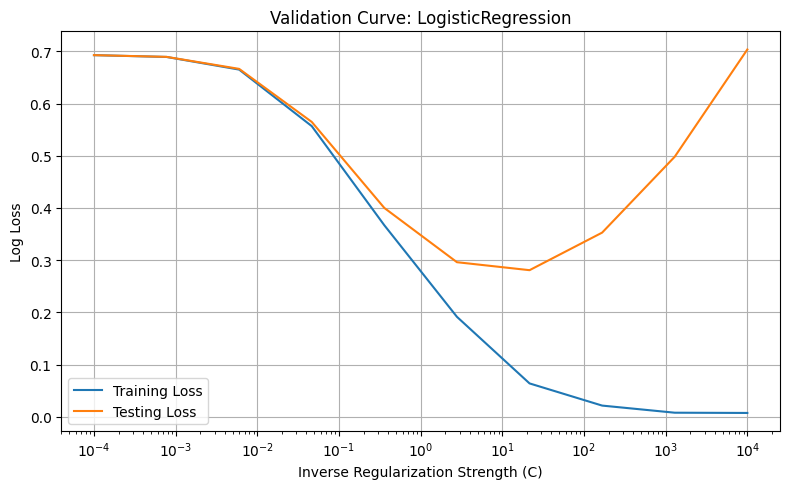

In [14]:
optimal_C = 12.915496650148826

# Training
lr_model_new = LogisticRegression(C=optimal_C, max_iter=1000, solver='lbfgs')
lr_model_new.fit(X_train, y_train)

# Evaluate
lr_preds_new = lr_model_new.predict(X_test)
print(classification_report(y_test, lr_preds_new))

# Plot validation curve for regularization strength
param_range = np.logspace(-4, 4, 10)
train_scores, test_scores = validation_curve(
    lr_model_new,
    X_train, y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="neg_log_loss"
)

# Ploting Train and Test Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(param_range, -train_scores.mean(axis=1), label="Training Loss")
plt.plot(param_range, -test_scores.mean(axis=1), label="Testing Loss")
plt.xscale("log")
plt.xlabel("Inverse Regularization Strength (C)")
plt.ylabel("Log Loss")
plt.title("Validation Curve: LogisticRegression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SVM

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12480
           1       0.88      0.90      0.89     12520

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



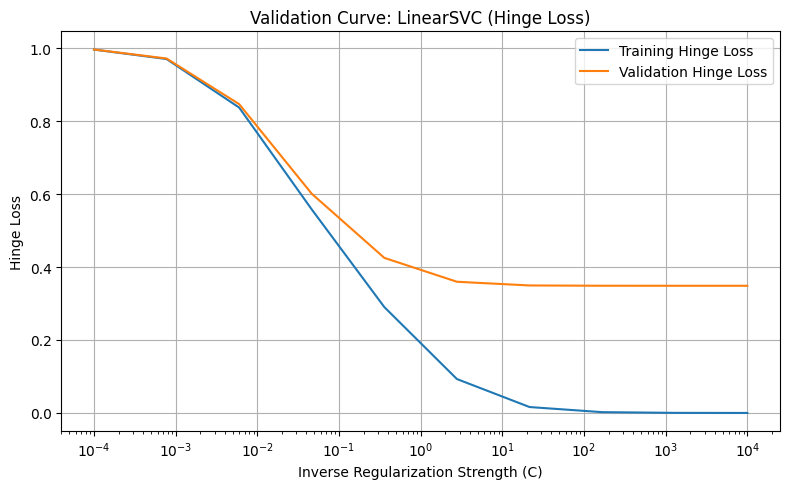

In [18]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import hinge_loss
import numpy as np
import matplotlib.pyplot as plt

# Training
svm_model = LinearSVC(C=1.0, max_iter=10000)
svm_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = svm_model.predict(X_test)
print("Classification Report : ")
print(classification_report(y_test, y_pred))


# Define range of C values
param_range = np.logspace(-4, 4, 10)

# Prepare arrays to store scores
train_losses = []
test_losses = []

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for C in param_range:
    train_fold_losses = []
    test_fold_losses = []
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        
        model = LinearSVC(C=C, max_iter=10000)
        model.fit(X_tr, y_tr)
        
        # Decision function is used for hinge loss
        y_tr_dec = model.decision_function(X_tr)
        y_val_dec = model.decision_function(X_val)
        
        train_loss = hinge_loss(y_tr, y_tr_dec)
        val_loss = hinge_loss(y_val, y_val_dec)
        
        train_fold_losses.append(train_loss)
        test_fold_losses.append(val_loss)
    
    train_losses.append(np.mean(train_fold_losses))
    test_losses.append(np.mean(test_fold_losses))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_losses, label="Training Hinge Loss")
plt.plot(param_range, test_losses, label="Validation Hinge Loss")
plt.xscale("log")
plt.xlabel("Inverse Regularization Strength (C)")
plt.ylabel("Hinge Loss")
plt.title("Validation Curve: LinearSVC (Hinge Loss)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     12480
           1       0.87      0.84      0.86     12520

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



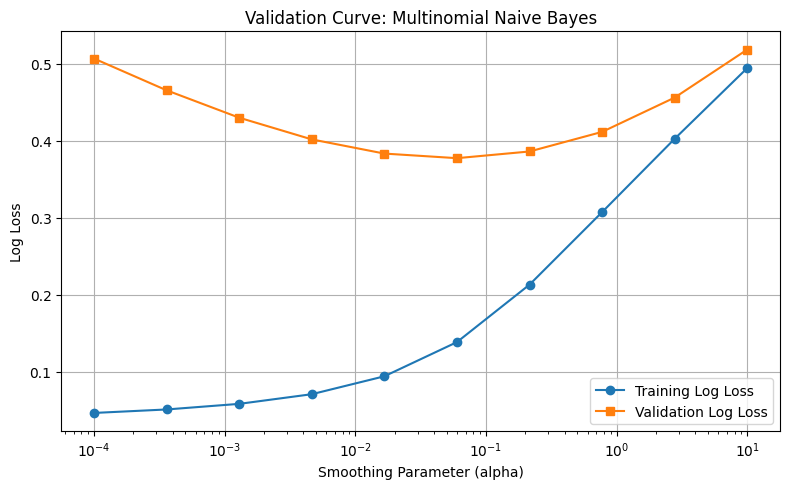

In [25]:
# Training
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = nb_model.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Validation curve for alpha (smoothing parameter)
param_range = np.logspace(-4, 1, 10)  # e.g., 0.001 to 10
train_scores, test_scores = validation_curve(
    MultinomialNB(),
    X_train, y_train,
    param_name="alpha",
    param_range=param_range,
    cv=5,
    scoring="neg_log_loss"
)

# Plotting log loss curves
plt.figure(figsize=(8, 5))
plt.plot(param_range, -train_scores.mean(axis=1), label="Training Log Loss", marker='o')
plt.plot(param_range, -test_scores.mean(axis=1), label="Validation Log Loss", marker='s')
plt.xscale("log")
plt.xlabel("Smoothing Parameter (alpha)")
plt.ylabel("Log Loss")
plt.title("Validation Curve: Multinomial Naive Bayes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Classification Report on Test Set : 
              precision    recall  f1-score   support

           0       0.82      0.58      0.68     12480
           1       0.68      0.87      0.76     12520

    accuracy                           0.73     25000
   macro avg       0.75      0.73      0.72     25000
weighted avg       0.75      0.73      0.72     25000



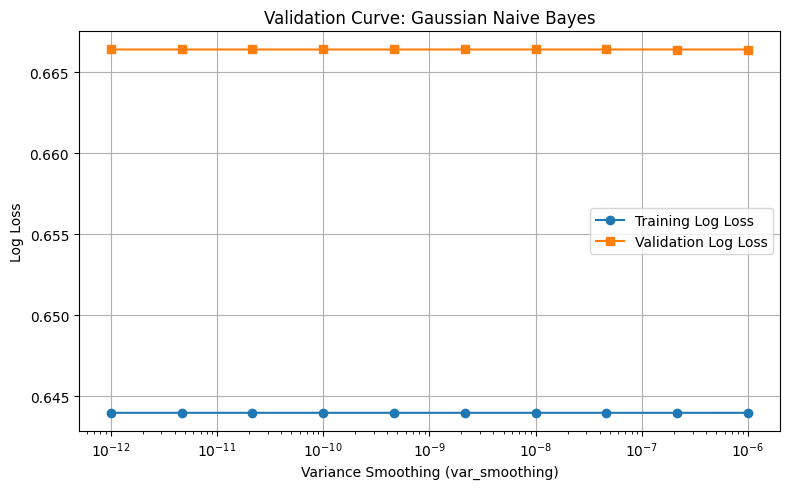

In [28]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Training
svd = TruncatedSVD(n_components=300)  
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)


gnb_model = GaussianNB(var_smoothing=1e-9)
gnb_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred = gnb_model.predict(X_test_scaled)
print("Classification Report on Test Set : ")
print(classification_report(y_test, y_pred))

# Validation curve for var_smoothing
param_range = np.logspace(-12, -6, 10)
train_losses = []
test_losses = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for var_smoothing in param_range:
    fold_train_losses = []
    fold_val_losses = []
    
    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        
        model = GaussianNB(var_smoothing=var_smoothing)
        model.fit(X_tr, y_tr)
        
        y_tr_prob = model.predict_proba(X_tr)
        y_val_prob = model.predict_proba(X_val)
        
        fold_train_losses.append(log_loss(y_tr, y_tr_prob))
        fold_val_losses.append(log_loss(y_val, y_val_prob))
    
    train_losses.append(np.mean(fold_train_losses))
    test_losses.append(np.mean(fold_val_losses))

# Plotting log loss curves
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_losses, label="Training Log Loss", marker='o')
plt.plot(param_range, test_losses, label="Validation Log Loss", marker='s')
plt.xscale("log")
plt.xlabel("Variance Smoothing (var_smoothing)")
plt.ylabel("Log Loss")
plt.title("Validation Curve: Gaussian Naive Bayes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Training
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf_model.predict(X_test)
print("Classification Report on Test Set : ")
print(classification_report(y_test, y_pred))

# Validation curve setup (e.g., varying n_estimators)
param_range = [10, 50, 100, 200, 300]
train_losses = []
test_losses = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for n in param_range:
    fold_train_losses = []
    fold_val_losses = []
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        
        model = RandomForestClassifier(n_estimators=n, random_state=42)
        model.fit(X_tr, y_tr)
        
        y_tr_prob = model.predict_proba(X_tr)
        y_val_prob = model.predict_proba(X_val)
        
        fold_train_losses.append(log_loss(y_tr, y_tr_prob))
        fold_val_losses.append(log_loss(y_val, y_val_prob))
    
    train_losses.append(np.mean(fold_train_losses))
    test_losses.append(np.mean(fold_val_losses))

# Plotting log loss curves
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_losses, label="Training Log Loss", marker='o')
plt.plot(param_range, test_losses, label="Validation Log Loss", marker='s')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Log Loss")
plt.title("Validation Curve: Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12480
           1       0.85      0.85      0.85     12520

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

